In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [2]:
df = pd.read_csv('Unified-1.csv', low_memory = False)

In [3]:
df.isna()

,DATE,TIME,STATION,LATITUDE,LONGITUDE,ELEVATION,TEMPERATURE,RELATIVE HUMIDITY,ACTUAL VAPOR PRESSURE,DEWPOINT TEMPERATURE,WIND DIRECTION,WIND GUST,WIND SPEED,GLOBAL SOLAR RADIATION,SOLAR RADIATION/MIN,PRECIPITATION,BAROMETRIC PRESSURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
131209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
131210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
131211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [4]:
df.dtypes

DATE                       object
TIME                       object
STATION                    object
LATITUDE                   object
LONGITUDE                  object
ELEVATION                  object
TEMPERATURE                object
RELATIVE HUMIDITY          object
ACTUAL VAPOR PRESSURE     float64
DEWPOINT TEMPERATURE       object
WIND DIRECTION            float64
WIND GUST                 float64
WIND SPEED                float64
GLOBAL SOLAR RADIATION    float64
SOLAR RADIATION/MIN       float64
PRECIPITATION             float64
BAROMETRIC PRESSURE       float64
dtype: object

In [5]:
date_obj = pd.to_datetime(df['DATE'], format ='%m/%d/%Y')
df['date']= date_obj

df['hour'] = df['TIME'].str.split(':').apply(lambda x: int(x[0]) + int(x[1]) / 60)
df.dtypes

DATE                              object
TIME                              object
STATION                           object
LATITUDE                          object
LONGITUDE                         object
ELEVATION                         object
TEMPERATURE                       object
RELATIVE HUMIDITY                 object
ACTUAL VAPOR PRESSURE            float64
DEWPOINT TEMPERATURE              object
WIND DIRECTION                   float64
WIND GUST                        float64
WIND SPEED                       float64
GLOBAL SOLAR RADIATION           float64
SOLAR RADIATION/MIN              float64
PRECIPITATION                    float64
BAROMETRIC PRESSURE              float64
date                      datetime64[ns]
hour                             float64
dtype: object

In [6]:
df['TEMPERATURE'] = df['TEMPERATURE'].str.replace('-', ' ').str.replace('+', ' ')
df['RELATIVE HUMIDITY'] = df['RELATIVE HUMIDITY'].str.replace('-', ' ').str.replace('+', ' ')
df['DEWPOINT TEMPERATURE'] = df['DEWPOINT TEMPERATURE'].str.replace('-', ' ').str.replace('+', ' ')

df[['TEMPERATURE', 'RELATIVE HUMIDITY', 'DEWPOINT TEMPERATURE']] = df[['TEMPERATURE', 'RELATIVE HUMIDITY', 'DEWPOINT TEMPERATURE']].astype(float)


In [7]:
df[['TEMPERATURE', 'RELATIVE HUMIDITY', 'DEWPOINT TEMPERATURE']] = df[['TEMPERATURE', 'RELATIVE HUMIDITY', 'DEWPOINT TEMPERATURE']].astype(float)


In [8]:
df.fillna(value = 0, inplace = True)
df

,DATE,TIME,STATION,LATITUDE,LONGITUDE,ELEVATION,TEMPERATURE,RELATIVE HUMIDITY,ACTUAL VAPOR PRESSURE,DEWPOINT TEMPERATURE,WIND DIRECTION,WIND GUST,WIND SPEED,GLOBAL SOLAR RADIATION,SOLAR RADIATION/MIN,PRECIPITATION,BAROMETRIC PRESSURE,date,hour
0,01/01/2019,0:00,Grand Coulee Dam,47.94527 N,-118.95361 W,1320',27.13,78.57,0.39,21.35,200.1,5.92,2.00,2343.0,0.0,12.98,30.41,2019-01-01,0.0
1,01/01/2019,1:00,Grand Coulee Dam,47.94527 N,-118.95361 W,1320',27.55,76.13,0.39,21.03,253.4,5.48,2.54,2343.0,0.0,12.98,30.40,2019-01-01,1.0
2,01/01/2019,2:00,Grand Coulee Dam,47.94527 N,-118.95361 W,1320',27.20,74.20,0.37,20.08,295.2,3.51,1.87,2343.0,0.0,12.98,30.40,2019-01-01,2.0
3,01/01/2019,3:00,Grand Coulee Dam,47.94527 N,-118.95361 W,1320',27.41,77.32,0.39,21.25,260.2,4.16,2.10,2343.0,0.0,12.98,30.39,2019-01-01,3.0
4,01/01/2019,4:00,Grand Coulee Dam,47.94527 N,-118.95361 W,1320',28.04,79.24,0.41,22.44,166.1,3.95,1.22,2343.0,0.0,12.98,30.37,2019-01-01,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131208,01/01/2022,19:00,Entiat Fish Hatchery,47.69796 N,-120.32373 W,1033',12.60,82.60,0.22,8.31,197.7,0.88,0.10,5763.0,0.0,9.28,0.00,2022-01-01,19.0
131209,01/01/2022,20:00,Entiat Fish Hatchery,47.69796 N,-120.32373 W,1033',12.83,78.70,0.21,7.45,337.1,3.95,1.50,5763.0,0.0,9.29,0.00,2022-01-01,20.0
131210,01/01/2022,21:00,Entiat Fish Hatchery,47.69796 N,-120.32373 W,1033',12.73,76.28,0.21,6.68,320.5,4.16,1.91,5763.0,0.0,9.29,0.00,2022-01-01,21.0
131211,01/01/2022,22:00,Entiat Fish Hatchery,47.69796 N,-120.32373 W,1033',11.19,78.99,0.20,5.94,336.2,4.38,1.65,5763.0,0.0,9.28,0.00,2022-01-01,22.0


In [9]:
data = df[['date','hour','TEMPERATURE','RELATIVE HUMIDITY','ACTUAL VAPOR PRESSURE','DEWPOINT TEMPERATURE','WIND DIRECTION','WIND GUST','WIND SPEED','GLOBAL SOLAR RADIATION','SOLAR RADIATION/MIN','PRECIPITATION','BAROMETRIC PRESSURE']]
corr=data.corr()

corr.style.background_gradient(cmap='coolwarm')

,date,hour,TEMPERATURE,RELATIVE HUMIDITY,ACTUAL VAPOR PRESSURE,DEWPOINT TEMPERATURE,WIND DIRECTION,WIND GUST,WIND SPEED,GLOBAL SOLAR RADIATION,SOLAR RADIATION/MIN,PRECIPITATION,BAROMETRIC PRESSURE
date,1.000000,-0.000156,0.090320,-0.079954,0.047760,0.073444,0.017504,0.045094,0.034027,0.005695,-0.011046,-0.378365,-0.001477
hour,-0.000156,1.000000,0.183384,-0.237625,-0.014272,-0.014094,0.036769,0.114133,0.088497,0.000458,0.131978,-0.000190,-0.000473
TEMPERATURE,0.090320,0.183384,1.000000,-0.713021,0.685193,0.655941,0.043059,0.227155,0.135613,-0.018889,0.507080,-0.081333,0.064260
RELATIVE HUMIDITY,-0.079954,-0.237625,-0.713021,1.000000,-0.069205,-0.143453,-0.064601,-0.400946,-0.298641,0.035822,-0.535021,0.033111,-0.078074
ACTUAL VAPOR PRESSURE,0.047760,-0.014272,0.685193,-0.069205,1.000000,0.867770,-0.004278,-0.062058,-0.079683,0.001996,0.131896,-0.085201,0.008096
DEWPOINT TEMPERATURE,0.073444,-0.014094,0.655941,-0.143453,0.867770,1.000000,-0.016567,-0.080949,-0.103255,-0.034845,0.113466,-0.101919,-0.018845
WIND DIRECTION,0.017504,0.036769,0.043059,-0.064601,-0.004278,-0.016567,1.000000,0.046286,0.002343,-0.012913,-0.022604,0.030256,0.093632
WIND GUST,0.045094,0.114133,0.227155,-0.400946,-0.062058,-0.080949,0.046286,1.000000,0.919550,-0.000419,0.227445,-0.024403,0.228679
WIND SPEED,0.034027,0.088497,0.135613,-0.298641,-0.079683,-0.103255,0.002343,0.919550,1.000000,0.001995,0.176437,-0.070625,0.341100
GLOBAL SOLAR RADIATION,0.005695,0.000458,-0.018889,0.035822,0.001996,-0.034845,-0.012913,-0.000419,0.001995,1.000000,-0.009395,0.002232,-0.004539


In [10]:
df['date_float']= df['date'].astype('int64')/10**9

In [11]:
X = df[['date_float','hour','TEMPERATURE', 'RELATIVE HUMIDITY', 'ACTUAL VAPOR PRESSURE', 'DEWPOINT TEMPERATURE', 'WIND DIRECTION', 'WIND GUST', 'WIND SPEED','SOLAR RADIATION/MIN','PRECIPITATION', 'BAROMETRIC PRESSURE']].values
y = df['GLOBAL SOLAR RADIATION'].values.reshape(-1, 1)  
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=70)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=70)


# Standardize features
scaler1 = StandardScaler()
scaler2 = StandardScaler()
X_train_scaled = scaler1.fit_transform(X_train)
X_val_scaled = scaler1.transform(X_val)
X_test_scaled = scaler1.transform(X_test)
y_train_scaled = scaler2.fit_transform(y_train)
y_val_scaled = scaler2.transform(y_val)
y_test_scaled = scaler2.transform(y_test)

#print(f"{X_train.shape} {X_val.shape} :: {X_test.shape}" )


In [12]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

w_d = 0.01
Epoch [10/100], Train Loss: 0.9939, Valid Loss: 0.9909
Epoch [20/100], Train Loss: 0.9877, Valid Loss: 0.9868
Epoch [30/100], Train Loss: 0.9850, Valid Loss: 0.9825
Epoch [40/100], Train Loss: 0.9844, Valid Loss: 0.9799
Epoch [50/100], Train Loss: 0.9828, Valid Loss: 0.9790
Epoch [60/100], Train Loss: 0.9827, Valid Loss: 0.9751
Epoch [70/100], Train Loss: 0.9832, Valid Loss: 0.9764
Epoch [80/100], Train Loss: 0.9833, Valid Loss: 0.9743
Epoch [90/100], Train Loss: 0.9830, Valid Loss: 0.9760
Epoch [100/100], Train Loss: 0.9833, Valid Loss: 0.9743
Train Loss: 0.9724
Validation Loss: 0.9743


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ComplexCNNLSTMModel(nn.Module):
    def __init__(self):
        super(ComplexCNNLSTMModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm1d(64)  
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm1d(128)  
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(256)  

        # Define LSTM layers
        self.lstm1 = nn.LSTM(input_size=256, hidden_size=128, num_layers=1, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=128, hidden_size=64, num_layers=1, batch_first=True)

        # Define fully connected layers with increased depth
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, 1)  # Output layer
        self.dropout = nn.Dropout(p=0.7)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add a channel dimension
        
        # Apply convolutional layers with increased complexity
        x = self.bn1(F.relu(self.conv1(x)))
        x = F.max_pool1d(x, kernel_size=2, stride=2)
        x = self.bn2(F.relu(self.conv2(x)))
        x = F.max_pool1d(x, kernel_size=2, stride=2)
        x = self.bn3(F.leaky_relu(self.conv3(x)))
        x = F.max_pool1d(x, kernel_size=2, stride=2)
        
        # Reshape for LSTM
        x = x.permute(0, 2, 1)  # Change shape from (batch_size, channels, sequence_length) to (batch_size, sequence_length, channels)

        # Apply LSTM layers
        lstm_out1, _ = self.lstm1(x)
        lstm_out2, _ = self.lstm2(lstm_out1)

        # Get the output from the last time step
        lstm_out = lstm_out2[:, -1, :]

        # Apply fully connected layers with increased depth
        x = F.relu(self.fc1(lstm_out))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiate the complex model
model = ComplexCNNLSTMModel()
print(model)


ComplexCNNLSTMModel(
  (conv1): Conv1d(1, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(64, 128, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm1): LSTM(256, 128, batch_first=True)
  (lstm2): LSTM(128, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.7, inplace=False)
)


Epoch [1/100], Train Loss: 0.9989, Valid Loss: 0.9899, Test Loss:  0.9910
Epoch [2/100], Train Loss: 0.9936, Valid Loss: 0.9909, Test Loss:  0.9913
Epoch [3/100], Train Loss: 0.9904, Valid Loss: 0.9864, Test Loss:  0.9872
Epoch [4/100], Train Loss: 0.9852, Valid Loss: 0.9789, Test Loss:  0.9790
Epoch [5/100], Train Loss: 0.9773, Valid Loss: 0.9740, Test Loss:  0.9749
Epoch [6/100], Train Loss: 0.9695, Valid Loss: 0.9604, Test Loss:  0.9604
Epoch [7/100], Train Loss: 0.9638, Valid Loss: 0.9581, Test Loss:  0.9574
Epoch [8/100], Train Loss: 0.9616, Valid Loss: 0.9600, Test Loss:  0.9596
Epoch [9/100], Train Loss: 0.9599, Valid Loss: 0.9574, Test Loss:  0.9567
Epoch [10/100], Train Loss: 0.9569, Valid Loss: 0.9536, Test Loss:  0.9526
Epoch [11/100], Train Loss: 0.9540, Valid Loss: 0.9515, Test Loss:  0.9502
Epoch [12/100], Train Loss: 0.9510, Valid Loss: 0.9466, Test Loss:  0.9454
Epoch [13/100], Train Loss: 0.9473, Valid Loss: 0.9441, Test Loss:  0.9426
Epoch [14/100], Train Loss: 0.9446

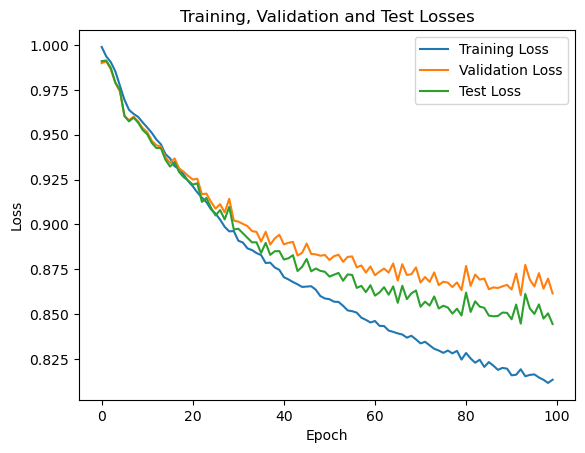

In [16]:
batch_size = 72
learning_rate = 0.0001

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Xavier initialization
for layer in [model.fc1, model.fc2]:
    nn.init.xavier_uniform_(layer.weight)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Using Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01)

train_losses = []
valid_losses = []
test_losses = []

num_epochs = 100  # Set a meaningful number of epochs
for epoch in range(num_epochs):
    train_loss = 0
    valid_loss = 0
    test_loss = 0
    
    model.train()  
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)
            
            
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
    
    # Calculate average loss per sample for the epoch
    train_loss /= len(train_loader.dataset)
    valid_loss /= len(val_loader.dataset)
    test_loss /= len(test_loader.dataset)
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, Test Loss: {test_loss: .4f}')
    
    # Append losses to the lists
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    test_losses.append(test_loss)

# Evaluation 
model.eval()  
with torch.no_grad():
    train_loss = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        train_loss += criterion(outputs, labels).item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    print(f'Train Loss: {train_loss:.4f}')

model.eval()  
with torch.no_grad():
    valid_loss = 0
    for inputs, labels in val_loader:
        outputs = model(inputs)
        valid_loss += criterion(outputs, labels).item() * inputs.size(0)
    valid_loss /= len(val_loader.dataset)
    print(f'Validation Loss: {valid_loss:.4f}')
    
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    print(f'Test Loss: {test_loss:.4f}')
    
        
 
# Plotting the training and validation losses

plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), valid_losses, label='Validation Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation and Test Losses')
plt.legend()
plt.show()


/var/folders/x7/_r8bw_1n571f46bh_8p4kw3m0000gp/T/ipykernel_89820/1998358245.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(Time_str, rotation=90)


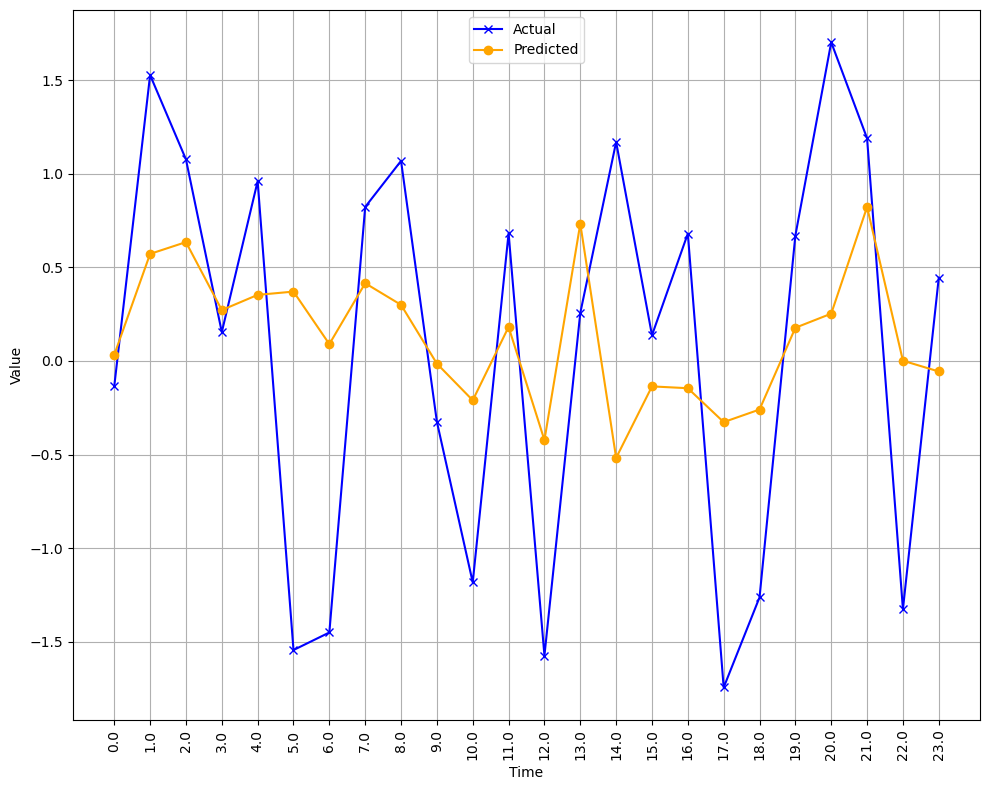

In [17]:
actual_values = []  
predicted_values = []  

Time = df['hour'][:24] 
Time_str = [str(hour) for hour in Time]

for inputs, labels in test_loader:
    outputs = model(inputs)
    actual_values.extend(labels.detach().numpy())
    predicted_values.extend(outputs.detach().numpy())


fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Time_str, actual_values[:24], color='blue',marker='x', label='Actual')
ax.plot(Time_str, predicted_values[:24], color='orange', marker='o', label='Predicted')

ax.set_xlabel('Time')
ax.set_ylabel('Value')

ax.legend(loc='upper center')

ax.set_xticklabels(Time_str, rotation=90)

ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ComplexCNNLSTMModel(nn.Module):
    def __init__(self):
        super(ComplexCNNLSTMModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm1d(64)  
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm1d(128)  
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(256)  

        # Define LSTM layers
        self.lstm1 = nn.LSTM(input_size=256, hidden_size=128, num_layers=1, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=128, hidden_size=64, num_layers=1, batch_first=True)

        # Define fully connected layers with increased depth
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, 1)  # Output layer
        self.dropout = nn.Dropout(p=0.75)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add a channel dimension
        
        # Apply convolutional layers with increased complexity
        x = self.bn1(F.relu(self.conv1(x)))
        x = F.max_pool1d(x, kernel_size=2, stride=2)
        x = self.bn2(F.relu(self.conv2(x)))
        x = F.max_pool1d(x, kernel_size=2, stride=2)
        x = self.bn3(F.leaky_relu(self.conv3(x)))
        x = F.max_pool1d(x, kernel_size=2, stride=2)
        
        # Reshape for LSTM
        x = x.permute(0, 2, 1)  # Change shape from (batch_size, channels, sequence_length) to (batch_size, sequence_length, channels)

        # Apply LSTM layers
        lstm_out1, _ = self.lstm1(x)
        lstm_out2, _ = self.lstm2(lstm_out1)

        # Get the output from the last time step
        lstm_out = lstm_out2[:, -1, :]

        # Apply fully connected layers with increased depth
        x = F.relu(self.fc1(lstm_out))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiate the complex model
model = ComplexCNNLSTMModel()
print(model)


batch_size = 72
learning_rate = 0.0001

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Xavier initialization
for layer in [model.fc1, model.fc2]:
    nn.init.xavier_uniform_(layer.weight)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Using Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01)

train_losses = []
valid_losses = []
test_losses = []

num_epochs = 100  # Set a meaningful number of epochs
for epoch in range(num_epochs):
    train_loss = 0
    valid_loss = 0
    test_loss = 0
    
    model.train()  
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)
            
            
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
    
    # Calculate average loss per sample for the epoch
    train_loss /= len(train_loader.dataset)
    valid_loss /= len(val_loader.dataset)
    test_loss /= len(test_loader.dataset)
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, Test Loss: {test_loss: .4f}')
    
    # Append losses to the lists
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    test_losses.append(test_loss)

# Evaluation 
model.eval()  
with torch.no_grad():
    train_loss = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        train_loss += criterion(outputs, labels).item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    print(f'Train Loss: {train_loss:.4f}')

model.eval()  
with torch.no_grad():
    valid_loss = 0
    for inputs, labels in val_loader:
        outputs = model(inputs)
        valid_loss += criterion(outputs, labels).item() * inputs.size(0)
    valid_loss /= len(val_loader.dataset)
    print(f'Validation Loss: {valid_loss:.4f}')
    
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    print(f'Test Loss: {test_loss:.4f}')
    
        
 
# Plotting the training and validation losses

plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), valid_losses, label='Validation Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation and Test Losses')
plt.legend()
plt.show()


actual_values = []  
predicted_values = []  

Time = df['hour'][:24] 
Time_str = [str(hour) for hour in Time]

for inputs, labels in test_loader:
    outputs = model(inputs)
    actual_values.extend(labels.detach().numpy())
    predicted_values.extend(outputs.detach().numpy())


fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Time_str, actual_values[:24], color='blue',marker='x', label='Actual')
ax.plot(Time_str, predicted_values[:24], color='orange', marker='o', label='Predicted')

ax.set_xlabel('Time')
ax.set_ylabel('Value')

ax.legend(loc='upper center')

ax.set_xticklabels(Time_str, rotation=90)

ax.grid(True)

plt.tight_layout()
plt.show()



/var/folders/x7/_r8bw_1n571f46bh_8p4kw3m0000gp/T/ipykernel_89820/625020012.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(Time_str, rotation=90)


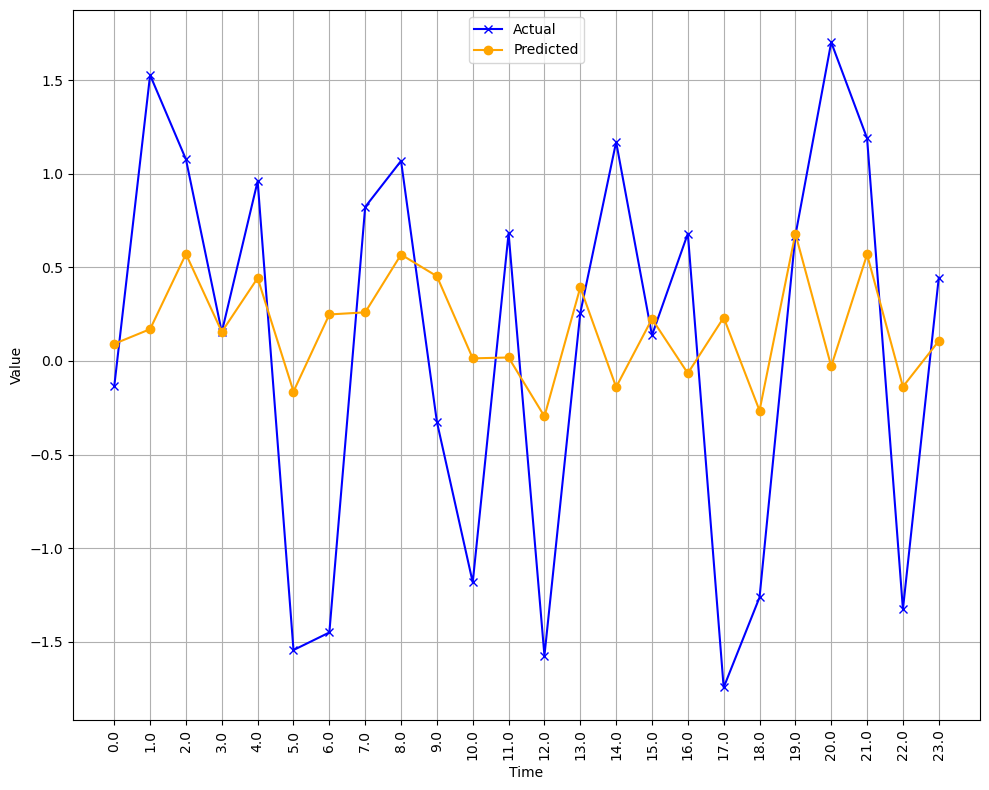

In [19]:
actual_values = []  
predicted_values = []  

Time = df['hour'][:24] 
Time_str = [str(hour) for hour in Time]

for inputs, labels in test_loader:
    outputs = model(inputs)
    actual_values.extend(labels.detach().numpy())
    predicted_values.extend(outputs.detach().numpy())


fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Time_str, actual_values[:24], color='blue',marker='x', label='Actual')
ax.plot(Time_str, predicted_values[:24], color='orange', marker='o', label='Predicted')

ax.set_xlabel('Time')
ax.set_ylabel('Value')

ax.legend(loc='upper center')

ax.set_xticklabels(Time_str, rotation=90)

ax.grid(True)

plt.tight_layout()
plt.show()


ComplexCNNLSTMModel(
  (conv1): Conv1d(1, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(64, 128, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm1): LSTM(256, 128, batch_first=True)
  (lstm2): LSTM(128, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.8, inplace=False)
)
Epoch [1/100], Train Loss: 1.0028, Valid Loss: 0.9956, Test Loss:  0.9965
Epoch [2/100], Train Loss: 0.9966, Valid Loss: 0.9939, Test Loss:  0.9947
Epoch [3/100], Train Loss: 0.9959, Valid Loss: 0.9950, Test Loss:  0.9963
Epoch [4/100], Train L

Train Loss: 0.8762
Validation Loss: 0.9212
Test Loss: 0.9135


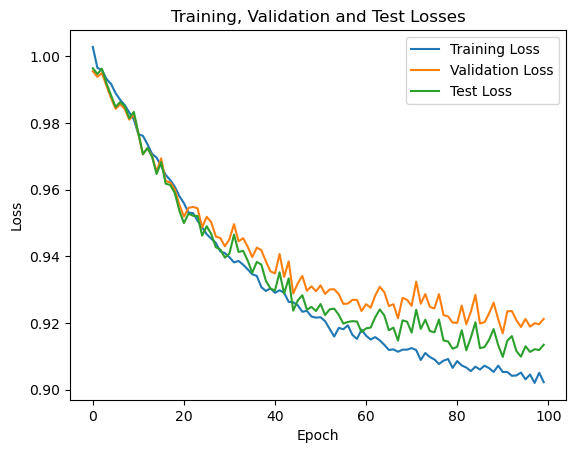

/var/folders/x7/_r8bw_1n571f46bh_8p4kw3m0000gp/T/ipykernel_89820/1674128532.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(Time_str, rotation=90)


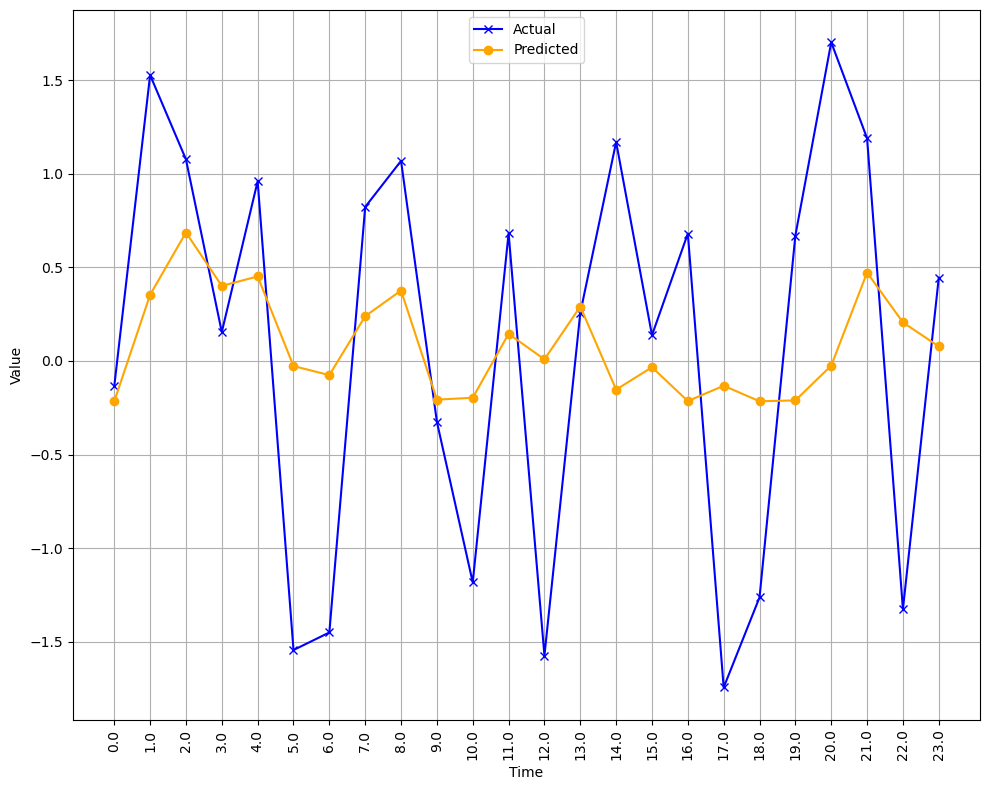

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ComplexCNNLSTMModel(nn.Module):
    def __init__(self):
        super(ComplexCNNLSTMModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm1d(64)  
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm1d(128)  
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(256)  

        # Define LSTM layers
        self.lstm1 = nn.LSTM(input_size=256, hidden_size=128, num_layers=1, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=128, hidden_size=64, num_layers=1, batch_first=True)

        # Define fully connected layers with increased depth
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, 1)  # Output layer
        self.dropout = nn.Dropout(p=0.8)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add a channel dimension
        
        # Apply convolutional layers with increased complexity
        x = self.bn1(F.relu(self.conv1(x)))
        x = F.max_pool1d(x, kernel_size=2, stride=2)
        x = self.bn2(F.relu(self.conv2(x)))
        x = F.max_pool1d(x, kernel_size=2, stride=2)
        x = self.bn3(F.leaky_relu(self.conv3(x)))
        x = F.max_pool1d(x, kernel_size=2, stride=2)
        
        # Reshape for LSTM
        x = x.permute(0, 2, 1)  # Change shape from (batch_size, channels, sequence_length) to (batch_size, sequence_length, channels)

        # Apply LSTM layers
        lstm_out1, _ = self.lstm1(x)
        lstm_out2, _ = self.lstm2(lstm_out1)

        # Get the output from the last time step
        lstm_out = lstm_out2[:, -1, :]

        # Apply fully connected layers with increased depth
        x = F.relu(self.fc1(lstm_out))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiate the complex model
model = ComplexCNNLSTMModel()
print(model)


batch_size = 72
learning_rate = 0.0001

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Xavier initialization
for layer in [model.fc1, model.fc2]:
    nn.init.xavier_uniform_(layer.weight)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Using Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01)

train_losses = []
valid_losses = []
test_losses = []

num_epochs = 100  # Set a meaningful number of epochs
for epoch in range(num_epochs):
    train_loss = 0
    valid_loss = 0
    test_loss = 0
    
    model.train()  
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)
            
            
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
    
    # Calculate average loss per sample for the epoch
    train_loss /= len(train_loader.dataset)
    valid_loss /= len(val_loader.dataset)
    test_loss /= len(test_loader.dataset)
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, Test Loss: {test_loss: .4f}')
    
    # Append losses to the lists
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    test_losses.append(test_loss)

# Evaluation 
model.eval()  
with torch.no_grad():
    train_loss = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        train_loss += criterion(outputs, labels).item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    print(f'Train Loss: {train_loss:.4f}')

model.eval()  
with torch.no_grad():
    valid_loss = 0
    for inputs, labels in val_loader:
        outputs = model(inputs)
        valid_loss += criterion(outputs, labels).item() * inputs.size(0)
    valid_loss /= len(val_loader.dataset)
    print(f'Validation Loss: {valid_loss:.4f}')
    
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    print(f'Test Loss: {test_loss:.4f}')
    
        
 
# Plotting the training and validation losses

plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), valid_losses, label='Validation Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation and Test Losses')
plt.legend()
plt.show()


actual_values = []  
predicted_values = []  

Time = df['hour'][:24] 
Time_str = [str(hour) for hour in Time]

for inputs, labels in test_loader:
    outputs = model(inputs)
    actual_values.extend(labels.detach().numpy())
    predicted_values.extend(outputs.detach().numpy())


fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Time_str, actual_values[:24], color='blue',marker='x', label='Actual')
ax.plot(Time_str, predicted_values[:24], color='orange', marker='o', label='Predicted')

ax.set_xlabel('Time')
ax.set_ylabel('Value')

ax.legend(loc='upper center')

ax.set_xticklabels(Time_str, rotation=90)

ax.grid(True)

plt.tight_layout()
plt.show()



/var/folders/x7/_r8bw_1n571f46bh_8p4kw3m0000gp/T/ipykernel_89820/625020012.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(Time_str, rotation=90)


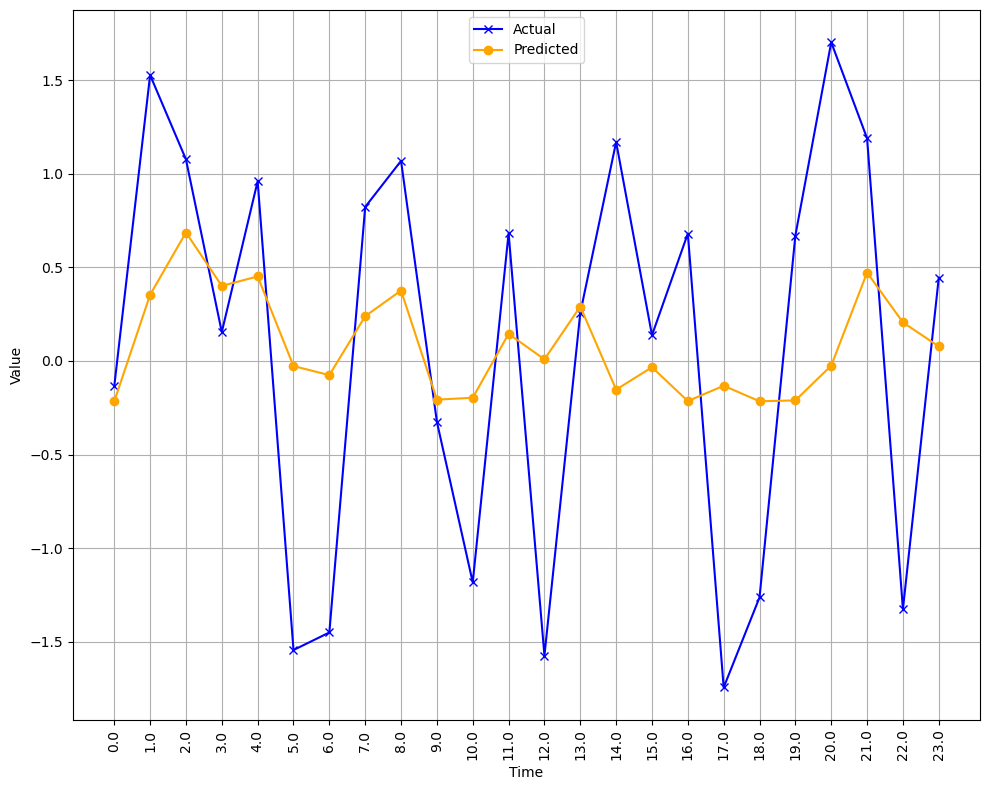

In [21]:
actual_values = []  
predicted_values = []  

Time = df['hour'][:24] 
Time_str = [str(hour) for hour in Time]

for inputs, labels in test_loader:
    outputs = model(inputs)
    actual_values.extend(labels.detach().numpy())
    predicted_values.extend(outputs.detach().numpy())


fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Time_str, actual_values[:24], color='blue',marker='x', label='Actual')
ax.plot(Time_str, predicted_values[:24], color='orange', marker='o', label='Predicted')

ax.set_xlabel('Time')
ax.set_ylabel('Value')

ax.legend(loc='upper center')

ax.set_xticklabels(Time_str, rotation=90)

ax.grid(True)

plt.tight_layout()
plt.show()
